In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
import torch

In [2]:
df = pd.read_csv("C:/Users/91741/Downloads/udise_schools/udise_schools.csv")

C:\Users\91741\AppData\Local\Temp\ipykernel_17608\3083609317.py:1: DtypeWarning: Columns (2,4,6,8,10,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/91741/Downloads/udise_schools/udise_schools.csv")


# Exploratory Data Analysis

In [3]:
df.shape

(1450490, 34)

In [4]:
df.head(2)

,id,objectid,schcd,schname,schcat,school_cat,schtype,school_typ,schmgt,management,...,sdtname,udise_dtco,udise_vico,dist_lgd,state_lgd,ud_st_n,ud_dt_n,lgd_dt_ud,lon,lat
0,1.0,1,35020300702,GOVT PRIMARY SCHOOL SHASTRI NAGAR,1,Primary,3,Co. Educational,1,Department of Education,...,,3502.0,350203007.0,603.0,35.0,35.0,3502.0,603.0,93.892304,6.811454
1,2.0,2,35020300201,GOVT SECONDARY SCHOOL GANDHI NAGAR,6,Pri. Upper Pri. and Secondary Only,3,Co. Educational,1,Department of Education,...,,3502.0,350203002.0,603.0,35.0,35.0,3502.0,603.0,93.890508,6.838517


In [5]:
print(df.duplicated().sum())
df.isnull().sum().sum()

0


103

Zero duplicates  
3-6 null values in each column, can remove them

In [6]:
df.columns

Index(['id', 'objectid', 'schcd', 'schname', 'schcat', 'school_cat', 'schtype',
       'school_typ', 'schmgt', 'management', 'rururb', 'location', 'pincode',
       'dtname', 'udise_stco', 'stname', 'vilname', 'longitude', 'latitude',
       'stcode11', 'dtcode11', 'sdtcode11', 'stname_1', 'dtname_1', 'sdtname',
       'udise_dtco', 'udise_vico', 'dist_lgd', 'state_lgd', 'ud_st_n',
       'ud_dt_n', 'lgd_dt_ud', 'lon', 'lat'],
      dtype='object')

In [7]:
cat_cols = df.select_dtypes("object").columns
num_cols = df.select_dtypes(exclude="object").columns

In [8]:
cat_cols

Index(['schcd', 'schname', 'schcat', 'school_cat', 'schtype', 'school_typ',
       'schmgt', 'management', 'rururb', 'location', 'pincode', 'dtname',
       'stname', 'vilname', 'latitude', 'stcode11', 'dtcode11', 'sdtcode11',
       'stname_1', 'dtname_1', 'sdtname'],
      dtype='object')

In [9]:
num_cols

Index(['id', 'objectid', 'udise_stco', 'longitude', 'udise_dtco', 'udise_vico',
       'dist_lgd', 'state_lgd', 'ud_st_n', 'ud_dt_n', 'lgd_dt_ud', 'lon',
       'lat'],
      dtype='object')

In [10]:
df[cat_cols].nunique()

schcd         1450490
schname       1369182
schcat             21
school_cat         12
schtype             9
school_typ          6
schmgt             32
management         18
rururb              6
location            2
pincode         18641
dtname            730
stname             38
vilname        420209
latitude      1072325
stcode11           42
dtcode11          790
sdtcode11           1
stname_1           37
dtname_1          730
sdtname             3
dtype: int64

udise_stco, state_lgd, ud_st_n are numeric columns with 37 or 38 unique values

In [11]:
print(df.schcat.unique())
print(df.schtype.unique())
print(df.rururb.unique())
print(df.schmgt.unique())

[1 6 3 2 5 7 10 4 8 11 '6' '1' '4' '10' '2' '8' '7' '3' '5' '11' nan
 'Co. Educational']
[3 1 2 '3' '1' '2' nan 'Private Unaided (Recognized)'
 'Madarsa recognized (by Wakf board/Madarsa Board)' 6]
[1 2 '2' '1' nan 'RAIPUR' 'MAHASAMUND']
[1 5 4 6 8 92 90 93 3 2 94 97 95 96 101 98 91 '4' '3' '1' '5' '8' '6' '97'
 '90' '2' '98' '93' '92' '95' '101' nan ' ']


### Remove these rows to convert to Numeric Columns
- schcat - Co. Educational         3
- schtype - Private Unaided (Recognized)                              2
            Madarsa recognized (by Wakf board/Madarsa Board)          1
- schmgt - " "
- rururb -  RAIPUR              2
            MAHASAMUND          1
- schcd, latitude, stcode11, dtcode11

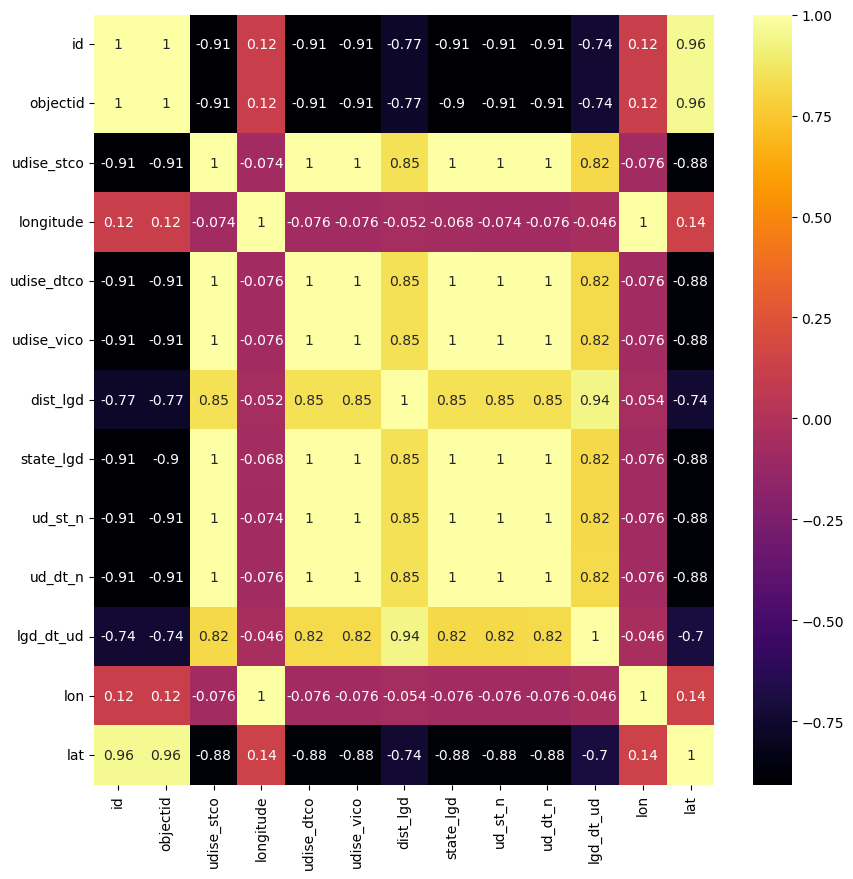

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

corr = df[num_cols].corr()
sns.heatmap(corr, cmap="inferno", annot=True, ax=ax)

plt.show()

In [13]:
df.describe()

,id,objectid,udise_stco,longitude,udise_dtco,udise_vico,dist_lgd,state_lgd,ud_st_n,ud_dt_n,lgd_dt_ud,lon,lat
count,1.450487e+06,1.450490e+06,1.450487e+06,1.450487e+06,1.450487e+06,1.450487e+06,1.450487e+06,1.450487e+06,1.450487e+06,1.450487e+06,1.450484e+06,1.450484e+06,1.450484e+06
mean,7.258223e+05,7.258208e+05,1.805115e+01,8.040676e+01,1.824467e+03,1.824546e+08,3.374132e+02,1.805178e+01,1.805115e+01,1.824467e+03,3.324600e+02,8.040586e+01,2.310575e+01
std,4.191243e+05,4.191252e+05,9.263479e+00,5.405808e+00,9.244666e+02,9.244781e+07,1.898143e+02,9.278154e+00,9.263479e+00,9.244666e+02,1.899288e+02,5.365642e+00,5.225547e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,6.840401e+01,2.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.121830e+01,0.000000e+00,6.840401e+01,6.811454e+00
25%,3.626225e+05,3.626202e+05,9.000000e+00,7.633306e+01,9.420000e+02,9.420604e+07,1.590000e+02,9.000000e+00,9.000000e+00,9.420000e+02,1.580000e+02,7.633306e+01,2.020018e+01
50%,7.262150e+05,7.262135e+05,1.900000e+01,7.927181e+01,1.922000e+03,1.922041e+08,3.430000e+02,1.900000e+01,1.900000e+01,1.922000e+03,3.380000e+02,7.927180e+01,2.408216e+01
75%,1.088836e+06,1.088836e+06,2.400000e+01,8.389219e+01,2.432000e+03,2.432031e+08,4.930000e+02,2.400000e+01,2.400000e+01,2.432000e+03,4.900000e+02,8.389210e+01,2.656710e+01
max,1.451458e+06,1.451458e+06,8.205601e+01,7.210000e+02,3.708000e+03,3.708070e+08,2.212000e+03,3.870000e+02,8.205601e+01,3.708000e+03,7.250000e+02,9.702722e+01,3.503212e+01


# Data Preprocessing

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum().sum()

0

stcode11, dtcode11, udise_vico. gpt told to keep

In [16]:
print((df["udise_stco"] == df["state_lgd"]).all() and (df["ud_st_n"] == df["udise_stco"]).all())

True


udise_stco, state_lgd, ud_st_n have same column values. I choose state_lgd.  
stcode11 have slightly different values from other 3 columns

In [17]:
print(np.sort(df["state_lgd"].unique()))

np.sort((df["stcode11"].apply(int)).unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.]


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38], dtype=int64)

No 25, 26, 28 in stcode11. No 25, 26 in state_lgd column

In [18]:
(df["dist_lgd"] == df["lgd_dt_ud"]).sum()

1295208

dist_lgd and lgd_dt_ud have different values

### Remove these columns
- id
- schcat
- schtype
- schmgt
- location
- longitude
- latitude
- sdtcode11
- stname_1
- sdtname
- dtname
- udise_stco
- ud_st_n
- ud_dt_n

In [19]:
new_df = df.drop(["id", "schcat", "schtype", "schmgt", "location", "longitude", "latitude", "sdtcode11", "stname_1", "sdtname", 
                  "dtname", "udise_stco", "ud_st_n", "ud_dt_n", "state_lgd", "udise_dtco", "dist_lgd", "lgd_dt_ud"], axis=1)

In [20]:
new_df.head(2)

,objectid,schcd,schname,school_cat,school_typ,management,rururb,pincode,stname,vilname,stcode11,dtcode11,dtname_1,udise_vico,lon,lat
0,1,35020300702,GOVT PRIMARY SCHOOL SHASTRI NAGAR,Primary,Co. Educational,Department of Education,1,744302,Andaman & Nicobar Islands,VIJAY NAGAR,35,638,Nicobars,350203007.0,93.892304,6.811454
1,2,35020300201,GOVT SECONDARY SCHOOL GANDHI NAGAR,Pri. Upper Pri. and Secondary Only,Co. Educational,Department of Education,1,744302,Andaman & Nicobar Islands,LAXMINAGAR,35,638,Nicobars,350203002.0,93.890508,6.838517


In [21]:
print(new_df.columns)

Index(['objectid', 'schcd', 'schname', 'school_cat', 'school_typ',
       'management', 'rururb', 'pincode', 'stname', 'vilname', 'stcode11',
       'dtcode11', 'dtname_1', 'udise_vico', 'lon', 'lat'],
      dtype='object')


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450483 entries, 0 to 1450489
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   objectid    1450483 non-null  int64  
 1   schcd       1450483 non-null  object 
 2   schname     1450483 non-null  object 
 3   school_cat  1450483 non-null  object 
 4   school_typ  1450483 non-null  object 
 5   management  1450483 non-null  object 
 6   rururb      1450483 non-null  object 
 7   pincode     1450483 non-null  object 
 8   stname      1450483 non-null  object 
 9   vilname     1450483 non-null  object 
 10  stcode11    1450483 non-null  object 
 11  dtcode11    1450483 non-null  object 
 12  dtname_1    1450483 non-null  object 
 13  udise_vico  1450483 non-null  float64
 14  lon         1450483 non-null  float64
 15  lat         1450483 non-null  float64
dtypes: float64(3), int64(1), object(12)
memory usage: 188.1+ MB


### Change Columns Type

rururb, pincode, stcode11, dtcode11 are in object. It must be converted to integer

In [38]:
df["rururb"].unique()

array([1, 2, '2', '1'], dtype=object)

In [ ]:
new_df["rururb"] = new_df["rururb"].apply(int)
new_df["rururb"].unique()

In [37]:
df.pincode.unique()

array(['744302', '744303', '744304', ..., '193332', '193593', '193003'],
      dtype=object)

In [ ]:
new_df["pincode"] = df["pincode"].replace(" ", "0")   # Goated function
new_df["pincode"] = new_df["pincode"].apply(int)
new_df["pincode"].unique()

In [40]:
new_df.stcode11.unique()

array([35, 33, 31, 32, 34, 29, 37, 30, 27, 36, 22, 21, 24, 23, '27', '22',
       '24', '21', '23', 19, '19', 20, 15, 16, 8, 9, 14, 18, 10, 17, 13,
       12, 11, 6, 7, 5, 3, 2, 4, 1, 38], dtype=object)

In [41]:
new_df["stcode11"] = df["stcode11"].apply(int)
new_df["stcode11"].unique()

array([35, 33, 31, 32, 34, 29, 37, 30, 27, 36, 22, 21, 24, 23, 19, 20, 15,
       16,  8,  9, 14, 18, 10, 17, 13, 12, 11,  6,  7,  5,  3,  2,  4,  1,
       38], dtype=int64)

In [42]:
new_df.dtcode11.unique()

array([638, 629, 628, 587, 601, 627, 600, 790, 599, 626, 598, 625, 597,
       596, 624, 622, 623, 595, 621, 612, 620, 594, 632, 618, 614, 633,
       619, 593, 640, 613, 592, 637, 616, 609, 610, 615, 591, 617, 611,
       608, 590, 789, 578, 636, 589, 635, 607, 630, 577, 576, 606, 639,
       588, 631, 573, 787, 584, 788, 575, 574, 604, 786, 554, 572, 605,
       571, 581, 603, 583, 602, 570, 569, 582, 568, 550, 566, 553, 551,
       567, 563, 564, 565, 586, 552, 561, 549, 562, 560, 555, 585, 559,
       529, 530, 548, 547, 556, 744, 745, 746, 557, 580, 545, 546, 781,
       539, 538, 528, 748, 634, 531, 579, 537, 541, 743, 747, 527, 526,
       753, 544, 536, 751, 742, 740, 752, 558, 749, 525, 741, 535, 540,
       723, 399, 543, 520, 524, 521, 780, 736, 542, 750, 534, 417, 739,
       398, 511, 522, 738, 416, 533, 523, 737, 414, 735, 508, 513, 389,
       734, 519, 396, 517, 388, 518, 733, 512, 397, 532, 722, 415, 395,
       514, 732, 515, 510, 509, 387, 390, 516, 386, 413, 720, 50

In [43]:
new_df["dtcode11"] = df["dtcode11"].apply(int)
new_df["dtcode11"].unique()

array([638, 629, 628, 587, 601, 627, 600, 790, 599, 626, 598, 625, 597,
       596, 624, 622, 623, 595, 621, 612, 620, 594, 632, 618, 614, 633,
       619, 593, 640, 613, 592, 637, 616, 609, 610, 615, 591, 617, 611,
       608, 590, 789, 578, 636, 589, 635, 607, 630, 577, 576, 606, 639,
       588, 631, 573, 787, 584, 788, 575, 574, 604, 786, 554, 572, 605,
       571, 581, 603, 583, 602, 570, 569, 582, 568, 550, 566, 553, 551,
       567, 563, 564, 565, 586, 552, 561, 549, 562, 560, 555, 585, 559,
       529, 530, 548, 547, 556, 744, 745, 746, 557, 580, 545, 546, 781,
       539, 538, 528, 748, 634, 531, 579, 537, 541, 743, 747, 527, 526,
       753, 544, 536, 751, 742, 740, 752, 558, 749, 525, 741, 535, 540,
       723, 399, 543, 520, 524, 521, 780, 736, 542, 750, 534, 417, 739,
       398, 511, 522, 738, 416, 533, 523, 737, 414, 735, 508, 513, 389,
       734, 519, 396, 517, 388, 518, 733, 512, 397, 532, 722, 415, 395,
       514, 732, 515, 510, 509, 387, 390, 516, 386, 413, 720, 50

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450483 entries, 0 to 1450489
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   objectid    1450483 non-null  int64  
 1   schcd       1450483 non-null  object 
 2   schname     1450483 non-null  object 
 3   school_cat  1450483 non-null  object 
 4   school_typ  1450483 non-null  object 
 5   management  1450483 non-null  object 
 6   rururb      1450483 non-null  int64  
 7   pincode     1450483 non-null  int64  
 8   stname      1450483 non-null  object 
 9   vilname     1450483 non-null  object 
 10  stcode11    1450483 non-null  int64  
 11  dtcode11    1450483 non-null  int64  
 12  dtname_1    1450483 non-null  object 
 13  udise_vico  1450483 non-null  float64
 14  lon         1450483 non-null  float64
 15  lat         1450483 non-null  float64
dtypes: float64(3), int64(5), object(8)
memory usage: 188.1+ MB


In [45]:
new_df.head(3)

,objectid,schcd,schname,school_cat,school_typ,management,rururb,pincode,stname,vilname,stcode11,dtcode11,dtname_1,udise_vico,lon,lat
0,1,35020300702,GOVT PRIMARY SCHOOL SHASTRI NAGAR,Primary,Co. Educational,Department of Education,1,744302,Andaman & Nicobar Islands,VIJAY NAGAR,35,638,Nicobars,350203007.0,93.892304,6.811454
1,2,35020300201,GOVT SECONDARY SCHOOL GANDHI NAGAR,Pri. Upper Pri. and Secondary Only,Co. Educational,Department of Education,1,744302,Andaman & Nicobar Islands,LAXMINAGAR,35,638,Nicobars,350203002.0,93.890508,6.838517
2,3,35020300703,GOVT PRIMARY SCHOOL LAXMI NAGAR,Primary,Co. Educational,Department of Education,1,744302,Andaman & Nicobar Islands,VIJAY NAGAR,35,638,Nicobars,350203007.0,93.886408,6.893214
